## Anomaly-Based Financial Fraud Detection Using Isolation Forest

 ## *Problem Statement*

Financial institutions process millions of transactions daily, out of which fraudulent transactions are extremely rare but cause huge financial losses.
Traditional rule-based or supervised machine learning approaches fail because:

- Fraud data is highly imbalanced

- Fraud patterns change over time

- Labelled fraud data is limited or unavailable

- Hence an unsupervised anomaly detection approach is required.

🔹 Goal: Detect fraudulent (anomalous) transactions without relying on labelled data using Isolation Forest.

## *Objectives of the Project*

1. Detect fraudulent transactions using an unsupervised learning model

2. Handle class imbalance effectively

3. Identify outliers/anomalies in transaction data

4. Build a robust and scalable fraud detection system

5. Generate actionable business insights from detected fraud patterns

## *Dataset Description*

The dataset represents financial transaction records, where each row corresponds to one transaction.

Dataset Characteristics: 

- The dataset contains bank transaction records including transaction amount, time, channel,
 login attempts, account balance, and customer attributes.

- No explicit fraud label is present, making this dataset suitable for anomaly-based detection.

## *Dataset Column Description*

| Column Name | Description |
|------------|-------------|
| TransactionID | Unique identifier for each transaction |
| AccountID | Unique identifier for customer account |
| TransactionAmount | Amount involved in the transaction |
| TransactionDate | Date and time when the transaction occurred |
| TransactionType | Type of transaction (e.g., transfer, withdrawal, payment) |
| Location | Geographic location of the transaction |
| DeviceID | Identifier of the device used for the transaction |
| IP Address | IP address from which the transaction was initiated |
| MerchantID | Identifier of the merchant involved |
| Channel | Transaction channel (e.g., online, mobile, ATM) |
| CustomerAge | Age of the customer |
| CustomerOccupation | Occupation category of the customer |
| TransactionDuration | Duration taken to complete the transaction |
| LoginAttempts | Number of login attempts before transaction |
| AccountBalance | Account balance after/before transaction |
| PreviousTransactionDate | Date and time of the previous transaction |


## *Importing Libraries*

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


## *Data Loading*

In [2]:
df = pd.read_csv(r"bank_transactions_data_2.csv")
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


## *Exploratory Data Analysis*

In [3]:
df.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

In [4]:
df.shape

(2512, 16)

In [5]:
df.dtypes

TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [7]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [8]:
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

*Dropping Unwanted Columns*

In [9]:
drop_cols = [
    "TransactionID",
    "AccountID",
    "DeviceID",
    "IP Address",
    "MerchantID"
]

df = df.drop(columns=drop_cols)

In [10]:
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])
df["PreviousTransactionDate"] = pd.to_datetime(df["PreviousTransactionDate"])

In [11]:
df["TransactionHour"] = df["TransactionDate"].dt.hour
df["TransactionDay"] = df["TransactionDate"].dt.day
df["TransactionWeekday"] = df["TransactionDate"].dt.weekday

df["TimeGapPrevTxn"] = (
    df["TransactionDate"] - df["PreviousTransactionDate"]
).dt.total_seconds()

In [12]:
df = df.drop(columns=["TransactionDate", "PreviousTransactionDate"])

*Encoding*

In [13]:
categorical_cols = df.select_dtypes(include="object").columns
categorical_cols

Index(['TransactionType', 'Location', 'Channel', 'CustomerOccupation'], dtype='object')

In [14]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [15]:
df

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionDay,TransactionWeekday,TimeGapPrevTxn
0,14.09,1,36,0,70,0,81,1,5112.21,16,11,1,-49477134.0
1,376.24,1,15,0,68,0,141,1,13758.91,16,27,1,-42823516.0
2,126.29,1,23,2,19,3,56,1,1122.35,18,10,0,-41694656.0
3,184.50,1,33,2,26,3,25,1,8569.06,16,5,4,-47403415.0
4,13.45,0,1,2,26,3,198,1,7429.40,17,16,0,-33228915.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,856.21,0,7,1,33,0,109,1,12690.79,17,26,2,-48178913.0
2508,251.54,1,40,1,48,0,177,1,254.75,17,22,2,-51201294.0
2509,28.63,1,36,1,56,2,146,1,3382.91,17,21,0,-38069989.0
2510,185.97,1,10,2,23,3,19,1,1776.91,16,24,4,-53452056.0


In [16]:
df.isnull().sum()

TransactionAmount      0
TransactionType        0
Location               0
Channel                0
CustomerAge            0
CustomerOccupation     0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
TransactionHour        0
TransactionDay         0
TransactionWeekday     0
TimeGapPrevTxn         0
dtype: int64

*Scaling*

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

## *EDA VISUALS*

*Transaction Amount Distribution*

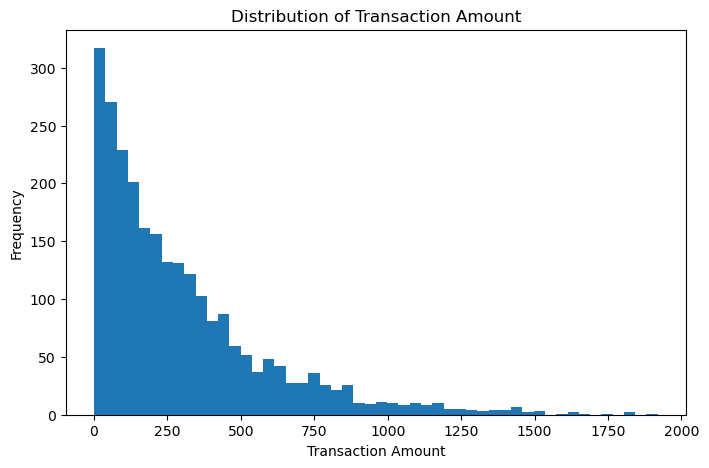

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
plt.hist(df["TransactionAmount"], bins=50)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

*Boxplot of Transaction Amount (Outliers)*

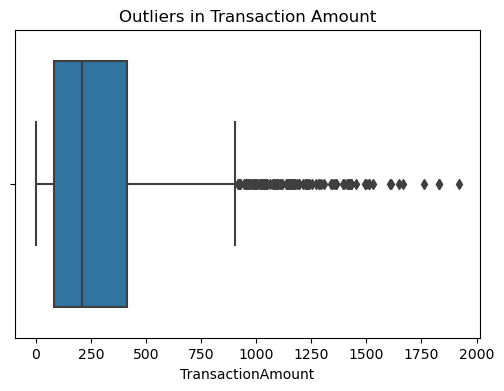

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["TransactionAmount"])
plt.title("Outliers in Transaction Amount")
plt.show()

*Login Attempts Distribution*

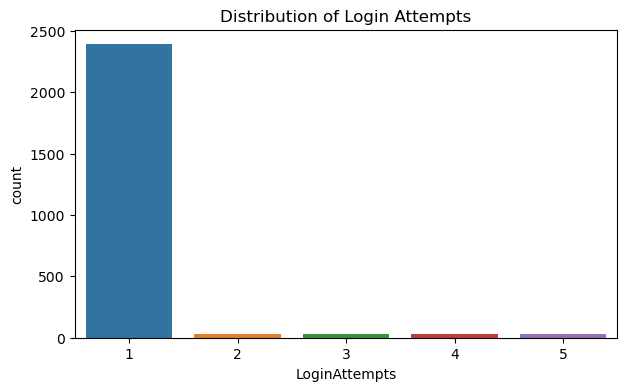

In [20]:
plt.figure(figsize=(7,4))
sns.countplot(x="LoginAttempts", data=df)
plt.title("Distribution of Login Attempts")
plt.show()

*Account Balance vs Transaction Amount*

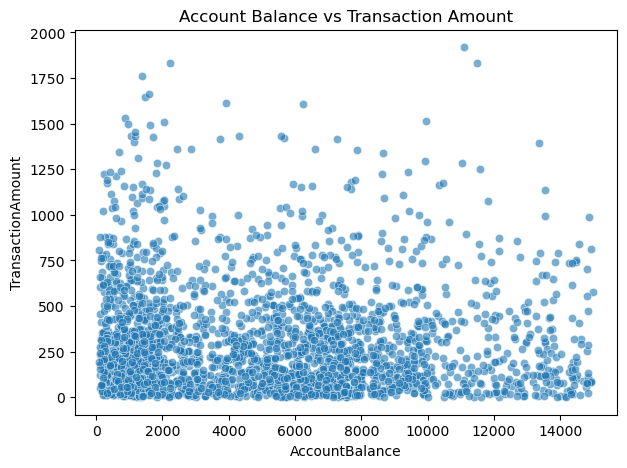

In [21]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="AccountBalance",
    y="TransactionAmount",
    data=df,
    alpha=0.6
)
plt.title("Account Balance vs Transaction Amount")
plt.show()


## *Isolation Forest Model Building* 

In [22]:
iso_forest = IsolationForest(n_estimators=100,contamination=0.02,random_state=42)
iso_forest.fit(X_scaled) #Model Training

IsolationForest(contamination=0.02, random_state=42)

In [23]:
anomaly_pred = iso_forest.predict(X_scaled)
df["Anomaly"] = np.where(anomaly_pred == -1, 1, 0)

In [24]:
df["AnomalyScore"] = iso_forest.decision_function(X_scaled)

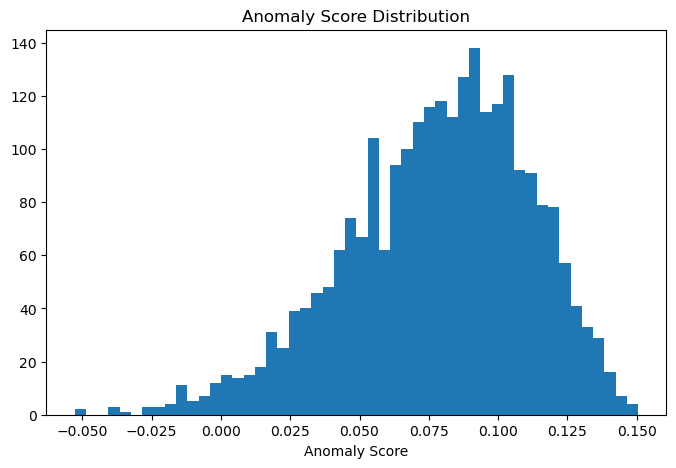

In [25]:
plt.figure(figsize=(8,5))
plt.hist(df["AnomalyScore"], bins=50)
plt.title("Anomaly Score Distribution")
plt.xlabel("Anomaly Score")
plt.show()

In [26]:
df.sort_values("AnomalyScore").head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionDay,TransactionWeekday,TimeGapPrevTxn,Anomaly,AnomalyScore
898,1531.31,1,36,2,18,3,62,4,859.86,18,23,0,-32623571.0,1,-0.052833
274,1176.28,0,18,0,54,1,174,5,323.69,16,20,2,-27619422.0,1,-0.049763
671,986.81,0,15,2,68,0,127,1,14881.77,16,31,4,-50426194.0,1,-0.039089
614,1342.25,0,13,1,21,3,235,1,694.03,18,28,4,-48002165.0,1,-0.037907
394,6.30,1,8,1,80,2,283,5,7697.68,18,14,3,-28127959.0,1,-0.037589


In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

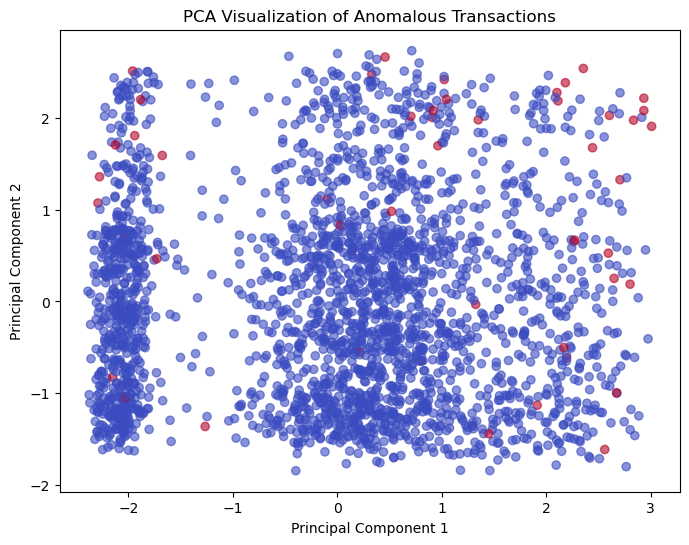

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=df["Anomaly"],
    cmap="coolwarm",
    alpha=0.6
)
plt.title("PCA Visualization of Anomalous Transactions")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [29]:
top_frauds = df.sort_values("AnomalyScore").head(10)
top_frauds

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionDay,TransactionWeekday,TimeGapPrevTxn,Anomaly,AnomalyScore
898,1531.31,1,36,2,18,3,62,4,859.86,18,23,0,-32623571.0,1,-0.052833
274,1176.28,0,18,0,54,1,174,5,323.69,16,20,2,-27619422.0,1,-0.049763
671,986.81,0,15,2,68,0,127,1,14881.77,16,31,4,-50426194.0,1,-0.039089
614,1342.25,0,13,1,21,3,235,1,694.03,18,28,4,-48002165.0,1,-0.037907
394,6.30,1,8,1,80,2,283,5,7697.68,18,14,3,-28127959.0,1,-0.037589
1557,262.43,0,36,2,37,0,274,5,12841.01,17,13,1,-44030452.0,1,-0.034224
2262,15.81,1,28,1,69,0,11,4,8384.85,18,2,3,-52925711.0,1,-0.028109
1213,1192.20,0,17,1,60,2,103,5,7816.41,16,21,3,-27532067.0,1,-0.026595
2124,737.46,0,0,1,53,0,75,4,634.16,16,3,1,-57944374.0,1,-0.026560
814,317.47,0,34,2,67,0,16,1,14639.28,17,1,0,-47745384.0,1,-0.021860


In [30]:
threshold = df["AnomalyScore"].quantile(0.02)
df["FraudLabel"] = (df["AnomalyScore"] <= threshold).astype(int)

df["FraudLabel"].value_counts()

FraudLabel
0    2461
1      51
Name: count, dtype: int64

In [31]:
df

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionDay,TransactionWeekday,TimeGapPrevTxn,Anomaly,AnomalyScore,FraudLabel
0,14.09,1,36,0,70,0,81,1,5112.21,16,11,1,-49477134.0,0,0.096003,0
1,376.24,1,15,0,68,0,141,1,13758.91,16,27,1,-42823516.0,0,0.071940,0
2,126.29,1,23,2,19,3,56,1,1122.35,18,10,0,-41694656.0,0,0.088253,0
3,184.50,1,33,2,26,3,25,1,8569.06,16,5,4,-47403415.0,0,0.048768,0
4,13.45,0,1,2,26,3,198,1,7429.40,17,16,0,-33228915.0,0,0.034379,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,856.21,0,7,1,33,0,109,1,12690.79,17,26,2,-48178913.0,0,0.024922,0
2508,251.54,1,40,1,48,0,177,1,254.75,17,22,2,-51201294.0,0,0.092172,0
2509,28.63,1,36,1,56,2,146,1,3382.91,17,21,0,-38069989.0,0,0.141156,0
2510,185.97,1,10,2,23,3,19,1,1776.91,16,24,4,-53452056.0,0,0.069467,0


## *Classification* 

In [32]:
X = df.drop(columns=["Anomaly", "AnomalyScore","FraudLabel"])
y = df["FraudLabel"]

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


## *RANDOM FOREST CLASSIFIER*

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[744  23]
 [  3 707]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       767
           1       0.97      1.00      0.98       710

    accuracy                           0.98      1477
   macro avg       0.98      0.98      0.98      1477
weighted avg       0.98      0.98      0.98      1477



In [36]:
def predict_fraud(new_transaction):
    scaled = scaler.transform(new_transaction)
    anomaly_score = iso_forest.decision_function(scaled)
    fraud_pred = rf.predict(scaled)
    return fraud_pred, anomaly_score

## *XG BOOST*

In [37]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

## *LIGHTGBM*

In [38]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgbm.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 1751, number of negative: 1694
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1176
[LightGBM] [Info] Number of data points in the train set: 3445, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508273 -> initscore=0.033094
[LightGBM] [Info] Start training from score 0.033094
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

LGBMClassifier(colsample_bytree=0.8, max_depth=6, n_estimators=200,
               random_state=42, subsample=0.8)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

models = {
    "Random Forest": rf,
    "XGBoost": xgb,
    "LightGBM": lgbm
}

for name, model in models.items():
    print(f"\n{name}")
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Random Forest
[[744  23]
 [  3 707]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       767
           1       0.97      1.00      0.98       710

    accuracy                           0.98      1477
   macro avg       0.98      0.98      0.98      1477
weighted avg       0.98      0.98      0.98      1477


XGBoost
[[747  20]
 [  1 709]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       767
           1       0.97      1.00      0.99       710

    accuracy                           0.99      1477
   macro avg       0.99      0.99      0.99      1477
weighted avg       0.99      0.99      0.99      1477


LightGBM
[[749  18]
 [  1 709]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       767
           1       0.98      1.00      0.99       710

    accuracy                           0.99      1477
   macro avg       0.99  

## *FEATURE IMPORTANCE*

In [40]:
rf_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

rf_importance.head(10)

,Feature,Importance
7,LoginAttempts,0.381789
1,TransactionType,0.216311
0,TransactionAmount,0.078211
8,AccountBalance,0.068255
12,TimeGapPrevTxn,0.056743
4,CustomerAge,0.036471
6,TransactionDuration,0.031149
5,CustomerOccupation,0.030734
10,TransactionDay,0.028761
11,TransactionWeekday,0.027471


## *RANDOM FOREST - FEATURE IMPORTANCE*

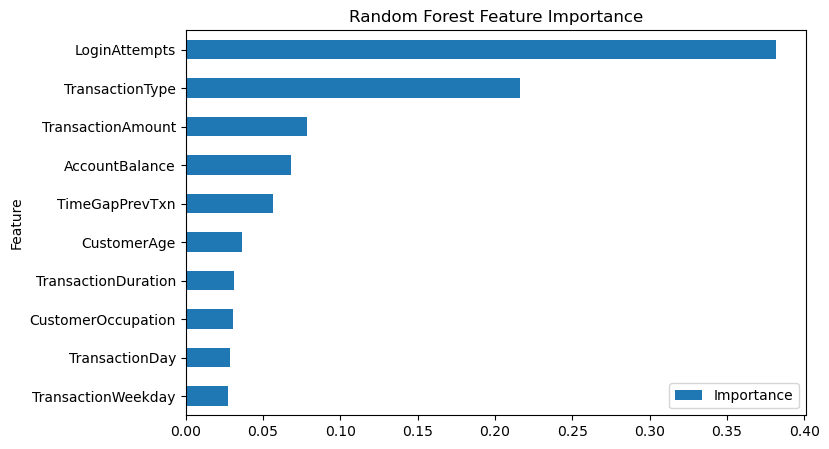

In [41]:
rf_importance.head(10).plot(
    x="Feature",
    y="Importance",
    kind="barh",
    title="Random Forest Feature Importance",
    figsize=(8,5)
)
plt.gca().invert_yaxis()
plt.show()

## *XGB CLASSIFIER - FEATURE IMPORTANCE*

In [42]:
xgb_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb.feature_importances_
}).sort_values(by="Importance", ascending=False)

xgb_importance.head(10)

,Feature,Importance
7,LoginAttempts,0.492182
1,TransactionType,0.233530
8,AccountBalance,0.043844
0,TransactionAmount,0.037255
5,CustomerOccupation,0.033479
12,TimeGapPrevTxn,0.029033
4,CustomerAge,0.023965
11,TransactionWeekday,0.023892
9,TransactionHour,0.019840
6,TransactionDuration,0.018280


## *LGBM CLASSIFIER - FEATURE IMPORTANCE*

In [43]:
lgbm_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": lgbm.feature_importances_
}).sort_values(by="Importance", ascending=False)

lgbm_importance.head(10)


,Feature,Importance
12,TimeGapPrevTxn,1065
0,TransactionAmount,705
8,AccountBalance,627
4,CustomerAge,601
10,TransactionDay,554
6,TransactionDuration,497
2,Location,479
7,LoginAttempts,333
11,TransactionWeekday,325
1,TransactionType,212


## *CONCLUSION*

This project developed an anomaly-based financial fraud detection framework using Isolation Forest to address the absence of labeled fraud data. Isolation Forest was selected because it efficiently detects rare and abnormal transactions in highly imbalanced datasets without requiring a target variable. It works by isolating anomalous transactions using random partitioning, making it well suited for evolving fraud patterns.

Supervised models such as Random Forest, XGBoost, and LightGBM were later applied using pseudo-labels generated from anomaly scores. While LightGBM achieved higher recall and XGBoost provided balanced performance, these models depend on labeled data and cannot function independently in unlabeled environments. Feature importance analysis revealed that transaction amount, login attempts, and temporal patterns are the most influential factors in fraud detection. Overall, the hybrid approach combining Isolation Forest with supervised classifiers offers a robust and scalable solution for real-world financial fraud detection.

## *PICKLE FILE GENERATION*

In [45]:
# Save trained Isolation Forest model
with open("isolation_forest.pkl", "wb") as f:
    pickle.dump(iso_forest, f)

# Save fitted scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Pickle files saved successfully")

Pickle files saved successfully
